# Segment 2: Tensor operation

## 15. Tensor tranposition

In [4]:
import numpy as np
import torch as torch
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
X = np.array([[25,2],[5,26],[3,7]])
X_torch = torch.tensor([[25,2],[5,26],[3,7]])
X_tf = tf.Variable([[25,2],[5,26],[3,7]])
print(X)
print(X.T)
print(X_torch.T)
print(tf.transpose(X_tf))

[[25  2]
 [ 5 26]
 [ 3  7]]
[[25  5  3]
 [ 2 26  7]]
tensor([[25,  5,  3],
        [ 2, 26,  7]])
tf.Tensor(
[[25  5  3]
 [ 2 26  7]], shape=(2, 3), dtype=int32)


## 16. Basic tensor arithmetic. The Hadamard Product
The Hadamard Product: the element-wise product ($A \odot B$)

In [16]:
# Add, multiply with a scalar
print(X * 2 + 2)
print(np.add(np.multiply(X,2),2))
print(X_torch * 2 + 2)
print(torch.add(torch.mul(X_torch,2),2))
print(tf.add(tf.multiply(X_tf,2),2))

[[52  6]
 [12 54]
 [ 8 16]]
[[52  6]
 [12 54]
 [ 8 16]]
tensor([[52,  6],
        [12, 54],
        [ 8, 16]])
tensor([[52,  6],
        [12, 54],
        [ 8, 16]])
tf.Tensor(
[[52  6]
 [12 54]
 [ 8 16]], shape=(3, 2), dtype=int32)


In [18]:
A = X + 1
A

array([[26,  3],
       [ 6, 27],
       [ 4,  8]])

In [20]:
print(A+X)
print(A-X)
print(A * X)
print(A/X)

[[51  5]
 [11 53]
 [ 7 15]]
[[1 1]
 [1 1]
 [1 1]]
[[650   6]
 [ 30 702]
 [ 12  56]]
[[1.04       1.5       ]
 [1.2        1.03846154]
 [1.33333333 1.14285714]]


## 17. Tensor reduction

In [23]:
X.sum()
print(torch.sum(X_torch))
print(tf.reduce_sum(X_tf))

tensor(68)
tf.Tensor(68, shape=(), dtype=int32)


In [24]:
X.max()

26

## 18. Dot product
- $x \cdot y$
- $x^Ty$
- $\langle x, y \rangle$

In [25]:
x = np.array([25, 2, 5])
y = np.array([0, 1, 2])

In [28]:
print(np.dot(x,y))
print(x @ y)
print(torch.dot(torch.tensor(x),torch.tensor(y)))
# print(tf.dot)

12
12
tensor(12, dtype=torch.int32)


In [37]:
x_tf = tf.Variable(x)
y_tf = tf.Variable(y)
print(tf.reduce_sum(tf.multiply(x_tf, y_tf)))
print(tf.reduce_sum(x_tf * y_tf))
print(tf.tensordot(x_tf,y_tf,axes=1))

tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)


## 19. Excercises on Tensor operations

In [ ]:
# 1.
y = np.array([[42, 4, 7, 99],[-99, -3, 17, 22]])
# My result: yT(2x4) = [[42 -99], [4, -3], [7, 18], [99, 22]]
y.T

array([[ 42, -99],
       [  4,  -3],
       [  7,  17],
       [ 99,  22]])

In [40]:
# 2. Hadamard product
a = np.array([[25,10],[-2, 1]])
b = np.array([[-1,7],[10,8]])
# My result: (2x2) [[-25, 70], [-20, 8]]
a * b

array([[-25,  70],
       [-20,   8]])

In [41]:
# 3. Dot product of the tensors w and x
w = np.array([-1, 2, -2])
x = np.array([5, 10, 0])
# My result: 15
w @ x

15

## 20. Solving Linear systems with substitution

#### 1. x + y = 6 and 2x + 3y = 16
- x + y = 6 => x = 6 - y
- 2x + 3y + 16
- => 2(6 - y) + 3y = 16 => y = 4 => x = 6 - 4 = 2

#### 2. -x + 4y = 0 and 2x - 5y = -6
- -x + 4y = 0 => x = 4y
- 2x - 5y = -6
- => 2(4y) - 5y = -6 => y = -2 => x = -8

#### 3. y = 4x + 1 and -4x + y = 2
- -4x + y = 2
- => -4x + (4x + 1) = 2 => 1 = 2 (non-sense), no solution


## 21. Solving Linear systems with Elimination

#### 1. 4x - 3y = 25 and -3x + 8y = 10
- $$ => 12x - 9y = 75 $$
- $$ 12x + 32y = 40 $$
- $$ => 23y = 115 => y = 5 => 4x - 3(5) = 25 => x = 10 $$

#### 2. -9x - 15y = -15 and 3x + 5y = -10
- -9x - 15y = -15 and 9x + 15y = -30
- => 0 = -45 (no solution)

#### 3. 4x + 2y = 4 and -5x - 3y = -7
- 12x + 6y = 12 and -10x -6y = -14
- => 2x = -2 => x = -1 => 4(-1) + 2y = 4 => y = 0

## 22. Visualizing Linear Systems

### Example 1:
$$ y = 3x $$
$$ -5x + 2y = 2 $$
- We solve and get the result: (x,y) = (2,6) 
$$ -5x + 2y = 2 $$
$$ <=> y = 1 + \frac{5x}{2} $$


In [23]:
x = np.linspace(-10, 10, 1000)
y1 = 3*x
y2 = 1 + (5*x)/2

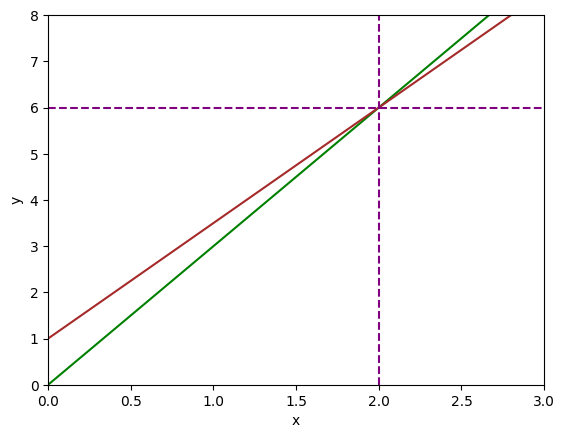

In [25]:
fig,ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([0,3])
ax.set_ylim([0,8])

ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')

plt.axvline(x=2, color='purple', linestyle='--')
plt.axhline(y=6, color='purple', linestyle='--')
plt.show()
# Look at the result below, the two lines intersect at (2,6)

### Example 2:
$$ 2x - 3y = 15 $$
$$ 4x + 10y = 14 $$
- Solving these two equations in the systems, we get the result **(x,y) = (6,-1)**
- Rearrage both equations to isolate y, we get two equations:
$$ y_1 = -5 + \frac{2x}{3} $$
$$ y_2 = \frac{7-2x}{5} $$

In [40]:
x = np.linspace(-10,10,1000)
y1 = -5 + 2*x/3
y2 = (7-2*x) /5

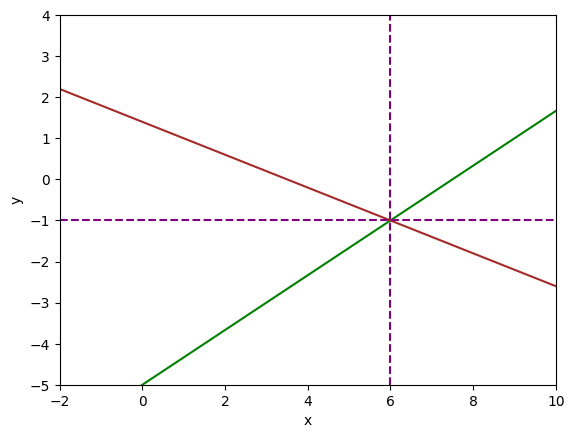

In [43]:
fig, ax = plt.subplots()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([-2,10])
ax.set_ylim([-5,4])

ax.plot(x,y1,color='green')
ax.plot(x,y2,color='brown')


plt.axvline(x=6,color='purple', linestyle='--')
plt.axhline(y=-1, color='purple', linestyle='--')
plt.show()